In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from tqdm import tqdm
from urllib.parse import urlparse
pd.set_option("display.max_colwidth", 200)
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_predict, GroupKFold
from sklearn.pipeline import FeatureUnion
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
%matplotlib inline

In [42]:
data = pd.read_csv('webpage data.csv')

In [43]:
data.head()

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfidera-gilenya-and-aubagio-s-3-way-battle-for-ms-share-about-to-get-more-interesting,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipped-to-weather-storm-u-s-diabetes-market-ceo-says,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exec-departs-troubled-endo-and-time-it-s-for-another-drugmaker,news
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-biosim-specialist-celltrion-it-wouldn-t-say-no,news
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-marissa-tomei-partners-allergan-restasis-to-drive-dry-eye-awareness,news


In [44]:
data.shape

(53229, 4)

<Axes: xlabel='Tag'>

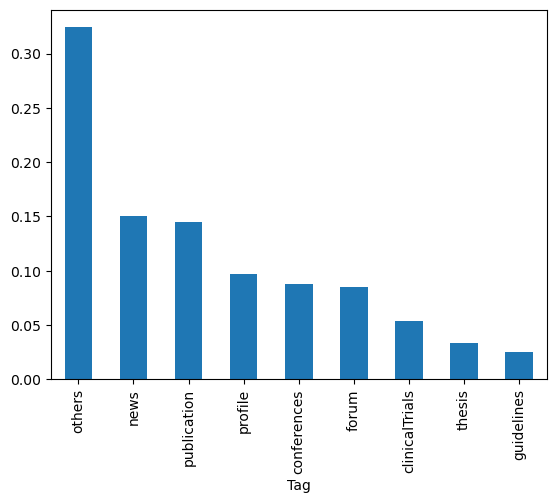

In [45]:
data['Tag'].value_counts(normalize = True).plot(kind = 'bar')

In [46]:
#pip install wordcloud

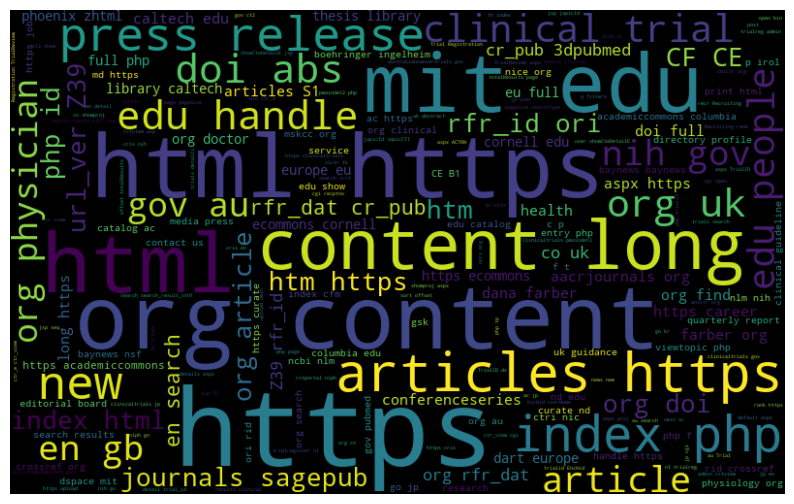

In [47]:
all_words = ' '.join([text for text in data['Url']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

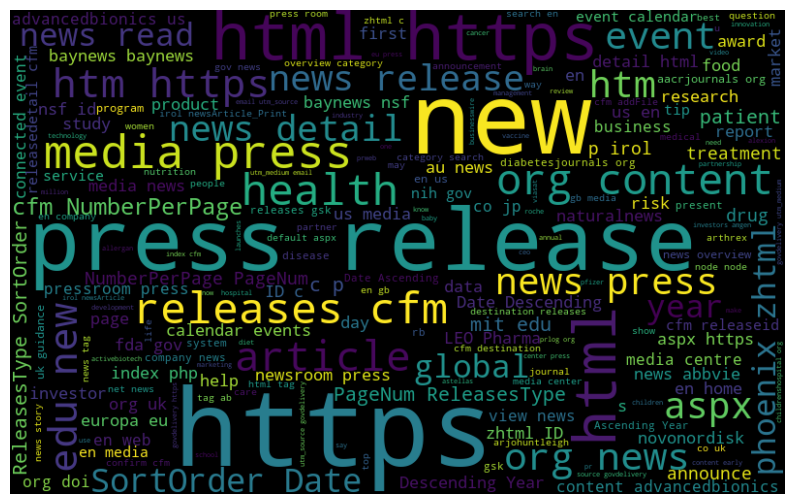

In [48]:
all_words = ' '.join([text for text in data[data['Tag']=='news']['Url']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [49]:
data['Tag'].value_counts()

Tag
others            17255
news               7984
publication        7693
profile            5163
conferences        4663
forum              4503
clinicalTrials     2839
thesis             1800
guidelines         1329
Name: count, dtype: int64

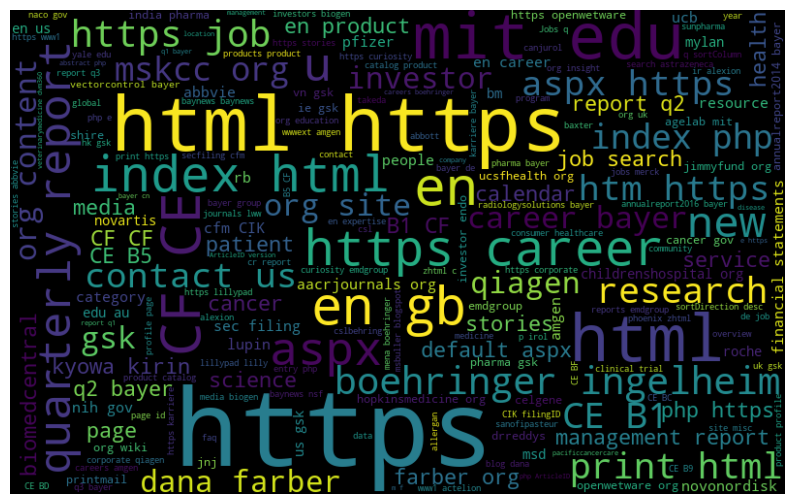

In [50]:
all_words = ' '.join([text for text in data[data['Tag']=='others']['Url']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


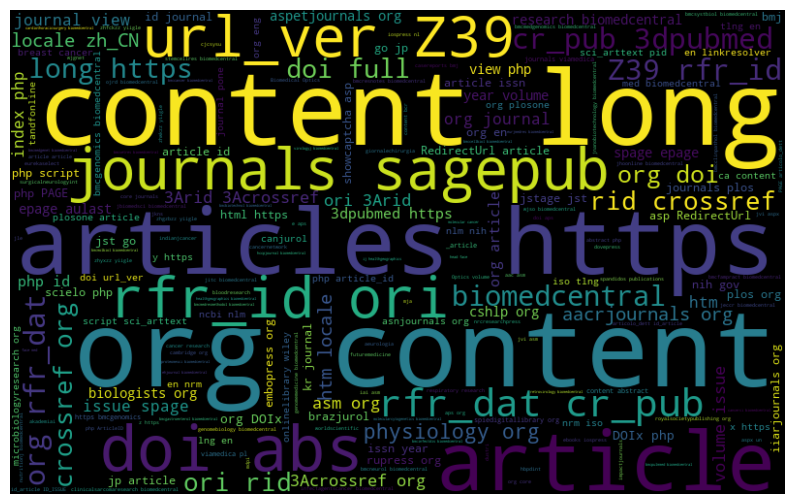

In [51]:
all_words = ' '.join([text for text in data[data['Tag']=='publication']['Url']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)
plt.figure(figsize = (10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [52]:
def cleaned(data):
    data['Url'] = data['Url'].str.replace("/"," ")
    data['Url'] = data['Url'].str.replace("-"," ")
    data['Url'] = data['Url'].str.replace("https","")
    data['Url'] = data['Url'].str.replace("http","")
    return data

In [53]:
data = cleaned(data) 

In [54]:
data['Url']

0        :  www.fiercepharma.com marketing tecfidera gilenya and aubagio s 3 way battle for ms share about to get more interesting
1                                       :  www.fiercepharma.com pharma novo equipped to weather storm u s diabetes market ceo says
2                            :  www.fiercepharma.com pharma another exec departs troubled endo and time it s for another drugmaker
3                                           :  www.fiercepharma.com pharma teva buy biosim specialist celltrion it wouldn t say no
4                    :  www.fiercepharma.com marketing actress marissa tomei partners allergan restasis to drive dry eye awareness
                                                                   ...                                                            
53224                                                            :  www.southlakehospital.com physician finder william j athans md
53225                                                          :  www.southlakehosp

In [55]:
vec_bow = CountVectorizer(ngram_range=(1,3), min_df = 400)
vec_bow.fit(data['Url'])
url_bow = vec_bow.transform(data['Url'])

In [56]:
data['target_str'] = data['Domain'].astype('str')+"_"+data['Tag'].astype('str')
cvlist = list(GroupKFold(5).split(data,groups= data['target_str']))

In [57]:
data['target_str'].head()

0    www.fiercepharma.com_news
1    www.fiercepharma.com_news
2    www.fiercepharma.com_news
3    www.fiercepharma.com_news
4    www.fiercepharma.com_news
Name: target_str, dtype: object

In [58]:
cvlist

[(array([    0,     1,     2, ..., 53226, 53227, 53228]),
  array([   35,    36,    37, ..., 53095, 53096, 53097])),
 (array([    0,     1,     2, ..., 53226, 53227, 53228]),
  array([   92,    93,    94, ..., 52815, 52816, 52817])),
 (array([    0,     1,     2, ..., 53226, 53227, 53228]),
  array([   34,    39,    55, ..., 53213, 53215, 53216])),
 (array([    0,     1,     2, ..., 53213, 53215, 53216]),
  array([   38,    58,   146, ..., 53226, 53227, 53228])),
 (array([   34,    35,    36, ..., 53226, 53227, 53228]),
  array([    0,     1,     2, ..., 53025, 53026, 53027]))]

In [59]:
X = url_bow 
tag_dict = {'others' : 1,
'news' :2,
'publication':3,
'profile': 4,
'conferences':5,
'forum':6,
'clinicalTrials':7,
'thesis':8,
'guidelines':9
}

data['Target'] = data['Tag'].map(tag_dict)
y = data['Target']

In [60]:
def cv_score(ml_model, data):
    i = 1
    cv_scores = []
    X = data
    
    # Custom Cross validation based on group KFold
    for data_index,test_index in cvlist:
        print('\n{} of Group kfold {}'.format(i,5))
        xtr,xvl = X[data_index],X[test_index]
        ytr,yvl = y[data_index],y[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        label_preds = np.argmax(pred_probs, axis=1) + 1
        
        # Calculate scores for each fold and print
        score = f1_score(yvl, label_preds, average="weighted")
        sufix = ""
        msg = ""
        msg += "Weighted F1 Score: {}".format(score)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(score)
        i+=1
    return cv_scores

In [61]:
#BernoulliNB, ComplementNB, MultinomialNB

In [62]:
cv_score(MultinomialNB(alpha=0.1), url_bow )


1 of Group kfold 5
Weighted F1 Score: 0.6244878137289313

2 of Group kfold 5
Weighted F1 Score: 0.6336360136654406

3 of Group kfold 5
Weighted F1 Score: 0.6083675810797521

4 of Group kfold 5
Weighted F1 Score: 0.6723530067581196

5 of Group kfold 5
Weighted F1 Score: 0.6861220340684231


[0.6244878137289313,
 0.6336360136654406,
 0.6083675810797521,
 0.6723530067581196,
 0.6861220340684231]

As the Scores are pretty so lets try also include charatcter and word both as a feature 

In [63]:
vec1 = CountVectorizer(analyzer='char', ngram_range=(1, 5), min_df=500)
vec2 = CountVectorizer(analyzer='word', ngram_range=(1, 3), min_df=400)
vec_bow = FeatureUnion([("char", vec1), ("word", vec2)])
vec_bow.fit(data['Url'])
Url_bow = vec_bow.transform(data['Url'])

In [64]:
vec_bow

FeatureUnion(transformer_list=[('char',
                                CountVectorizer(analyzer='char', min_df=500,
                                                ngram_range=(1, 5))),
                               ('word',
                                CountVectorizer(min_df=400,
                                                ngram_range=(1, 3)))])

In [65]:
cv_score(MultinomialNB(alpha=.01), Url_bow)


1 of Group kfold 5
Weighted F1 Score: 0.6790836320370593

2 of Group kfold 5
Weighted F1 Score: 0.6670396141199936

3 of Group kfold 5
Weighted F1 Score: 0.6927345397715821

4 of Group kfold 5
Weighted F1 Score: 0.7228367163668931

5 of Group kfold 5
Weighted F1 Score: 0.7048289819418095


[0.6790836320370593,
 0.6670396141199936,
 0.6927345397715821,
 0.7228367163668931,
 0.7048289819418095]

Much better performance than previous, but we can do better 

lets try giving weights to the features using TF-IDF Vectorizer

In [67]:
vec1 = TfidfVectorizer(analyzer='char', ngram_range=(1, 5), min_df=500)
vec2 = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=400)
vec_tfidf = FeatureUnion([("char", vec1), ("word", vec2)])
vec_tfidf.fit(data['Url'])
Url_tfidf = vec_tfidf.transform(data['Url'])

In [68]:
nb = cv_score(MultinomialNB(alpha=.01), Url_tfidf)


1 of Group kfold 5
Weighted F1 Score: 0.7088810658392468

2 of Group kfold 5
Weighted F1 Score: 0.7039625332203702

3 of Group kfold 5
Weighted F1 Score: 0.7161449547166985

4 of Group kfold 5
Weighted F1 Score: 0.7470919880482452

5 of Group kfold 5
Weighted F1 Score: 0.7296810063996276


slight imporvement from previous 

Trying Other Models also

# Logsitic Regression

In [69]:
log_reg = cv_score(LogisticRegression(C=0.1,class_weight="balanced"), Url_tfidf)


1 of Group kfold 5
Weighted F1 Score: 0.701371399674961

2 of Group kfold 5
Weighted F1 Score: 0.7428870023327335

3 of Group kfold 5
Weighted F1 Score: 0.7485016127341161

4 of Group kfold 5
Weighted F1 Score: 0.7984839858880622

5 of Group kfold 5
Weighted F1 Score: 0.7927500070251267


Nearly 80 percent with Logistic Regression

Lets also try Tree based models 

# Random Forest

In [70]:
rf_params = {'random_state': 0, 'n_jobs': -1, 'n_estimators': 100, 'max_depth': 50, 'n_jobs': -1}
rf = cv_score(RandomForestClassifier(**rf_params), Url_tfidf)


1 of Group kfold 5
Weighted F1 Score: 0.6657602102249479

2 of Group kfold 5
Weighted F1 Score: 0.6825200721175626

3 of Group kfold 5
Weighted F1 Score: 0.6591577994564304

4 of Group kfold 5
Weighted F1 Score: 0.7373783629797915

5 of Group kfold 5
Weighted F1 Score: 0.73562451280005


# Decision Tree|

In [71]:
dtree = cv_score(DecisionTreeClassifier(min_samples_leaf=25, min_samples_split=25), Url_tfidf)


1 of Group kfold 5
Weighted F1 Score: 0.6043988317742237

2 of Group kfold 5
Weighted F1 Score: 0.6198319322217418

3 of Group kfold 5
Weighted F1 Score: 0.6191749184841231

4 of Group kfold 5
Weighted F1 Score: 0.6291769472064462

5 of Group kfold 5
Weighted F1 Score: 0.665443085424013


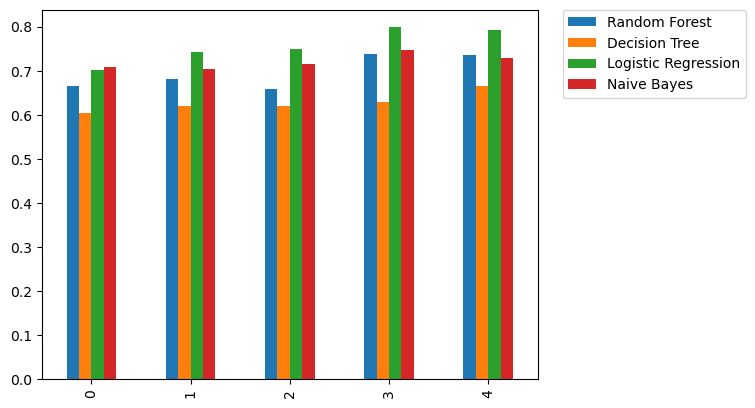

In [77]:
results_df = pd.DataFrame({'Random Forest':rf, 'Decision Tree': dtree, 'Logistic Regression': log_reg, 'Naive Bayes':nb})
results_df.plot(y=["Random Forest", "Decision Tree","Logistic Regression","Naive Bayes"], kind="bar")
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,  borderaxespad=0.)
plt.show()